<h3 align=center><font size = 5>Visulization of Toronto  city crime data based on police divisions</font></h3>


# Introduction
>**In this  notebook the Toronto crime Dataset  Major Crime Indicators (MCI) 2014 to 2019 occurrences by reported date is used for the Visulization.
>The data is loaded, Analysed and processed for the visulization**
>**Visulization is performed using matplotlib and chlopleth maps**

>**Toronto  crime data is available (https://data.torontopolice.on.ca/search?q=crime).
>The Major Crime Indicators categories are Assault, Break and Enter,  Auto Theft, Robbery and Theft Over **

## 1.Loading and Exploring the  data
>**1.The geojson file  of Toronto city divisions is used   and crimecount is Visualized using Chloropleth maps. 
>[ ](https://data.cityofnewyork.us/City-Government/Neighborhood-Tabulation-Areas-NTA-/cpf4-rkhq)**


>**All dependecies are installed and libraries are imported**

In [1]:
!conda install -c conda-forge folium=0.11.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.11.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    folium-0.11.0              |             py_0          61 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    branca:          0.4.1-py_0        conda-forge
    folium:   

In [2]:
folium.__version__

'0.11.0'

In [ ]:
!conda install -c conda-forge geopy --yes #  the Foursquare API 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: \ 

In [4]:
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from io import BytesIO
import json
from pandas.io.json import json_normalize


>**Toronto crime data is loaded into server and is converted to dataframe**

In [5]:
# The code was removed by Watson Studio for sharing.

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
0,-79.405228,43.656982,7801,GO-20152165447,2015-12-18T03:58:00.000Z,2015-12-18T03:59:00.000Z,Commercial,1430,100,Assault,...,352.0,Friday,3,Assault,D14,79,University (79),-79.405228,43.656982,7001
1,-79.307907,43.778732,7802,GO-20151417245,2015-08-15T21:45:00.000Z,2015-08-17T22:11:00.000Z,Commercial,1430,100,Assault,...,227.0,Saturday,21,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.307907,43.778732,7002
2,-79.225029,43.765942,7803,GO-20151421107,2015-08-16T16:00:00.000Z,2015-08-18T14:40:00.000Z,Apartment,2120,200,B&E,...,228.0,Sunday,16,Break and Enter,D43,137,Woburn (137),-79.225029,43.765942,7003
3,-79.140823,43.778648,7804,GO-20152167714,2015-11-26T13:00:00.000Z,2015-12-18T13:38:00.000Z,Other,2120,200,B&E,...,330.0,Thursday,13,Break and Enter,D43,133,Centennial Scarborough (133),-79.140823,43.778648,7004
4,-79.288361,43.691235,7805,GO-20152169954,2015-12-18T19:50:00.000Z,2015-12-18T19:55:00.000Z,Commercial,1430,100,Assault,...,352.0,Friday,19,Assault,D55,61,Taylor-Massey (61),-79.288361,43.691235,7005


>**Data Exploration**

In [6]:
TO_crime.columns.tolist()

['X',
 'Y',
 'Index_',
 'event_unique_id',
 'occurrencedate',
 'reporteddate',
 'premisetype',
 'ucr_code',
 'ucr_ext',
 'offence',
 'reportedyear',
 'reportedmonth',
 'reportedday',
 'reporteddayofyear',
 'reporteddayofweek',
 'reportedhour',
 'occurrenceyear',
 'occurrencemonth',
 'occurrenceday',
 'occurrencedayofyear',
 'occurrencedayofweek',
 'occurrencehour',
 'MCI',
 'Division',
 'Hood_ID',
 'Neighbourhood',
 'Long',
 'Lat',
 'ObjectId']

In [7]:
TO_crime.shape

(206435, 29)

In [8]:
TO_crime.dtypes

X                      float64
Y                      float64
Index_                   int64
event_unique_id         object
occurrencedate          object
reporteddate            object
premisetype             object
ucr_code                 int64
ucr_ext                  int64
offence                 object
reportedyear             int64
reportedmonth           object
reportedday              int64
reporteddayofyear        int64
reporteddayofweek       object
reportedhour             int64
occurrenceyear         float64
occurrencemonth         object
occurrenceday          float64
occurrencedayofyear    float64
occurrencedayofweek     object
occurrencehour           int64
MCI                     object
Division                object
Hood_ID                  int64
Neighbourhood           object
Long                   float64
Lat                    float64
ObjectId                 int64
dtype: object

In [9]:
TO_crime['reportedyear'].unique()

array([2015, 2014, 2016, 2017, 2018, 2019])

>**Data Preprocessing**

>Removing Unwanted columns

In [10]:
TO_crimeyear=TO_crime.drop(['X', 'Y', 'Index_', 'event_unique_id', 'occurrencedate', 'reporteddate', 'premisetype', 'ucr_code', 'ucr_ext','reportedday', 'reporteddayofyear','reporteddayofweek', 'reportedhour','occurrenceyear','occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','Hood_ID','Neighbourhood','Long','Lat','ObjectId'],axis=1,inplace=False)

In [11]:
TO_crimeyear.head()

,offence,reportedyear,reportedmonth,MCI,Division
0,Assault,2015,December,Assault,D14
1,Assault,2015,August,Assault,D42
2,B&E,2015,August,Break and Enter,D43
3,B&E,2015,December,Break and Enter,D43
4,Assault,2015,December,Assault,D55


>Grouping the data based on reported year and MCI

In [12]:
TO_crimeyear1= TO_crimeyear.groupby(['reportedyear','MCI'],as_index=False).count()
TO_crimeyear1["crimecount"]=TO_crimeyear1['offence']
TO_crimeyear1.drop(['offence','reportedmonth','Division'],axis=1,inplace=True)
TO_crimeyear1

,reportedyear,MCI,crimecount
0,2014,Assault,16429
1,2014,Auto Theft,3477
2,2014,Break and Enter,7179
3,2014,Robbery,3616
4,2014,Theft Over,990
5,2015,Assault,17764
6,2015,Auto Theft,3208
7,2015,Break and Enter,6900
8,2015,Robbery,3465
9,2015,Theft Over,1026


>Converting to Pivot Table

In [13]:
TO_yrdivpivot=TO_crimeyear1.pivot_table(index='reportedyear',columns='MCI')

In [14]:
TO_yrdivpivot

crimecount                                              
MCI             Assault Auto Theft Break and Enter Robbery Theft Over
reportedyear                                                         
2014              16429       3477            7179    3616        990
2015              17764       3208            6900    3465       1026
2016              18508       3265            6398    3613       1025
2017              18845       3523            6882    3905       1164
2018              19451       4721            7557    3527       1227
2019              20426       5186            8386    3417       1355

>Plotting Data using Matplotlib

>**plotting using Areaplots**

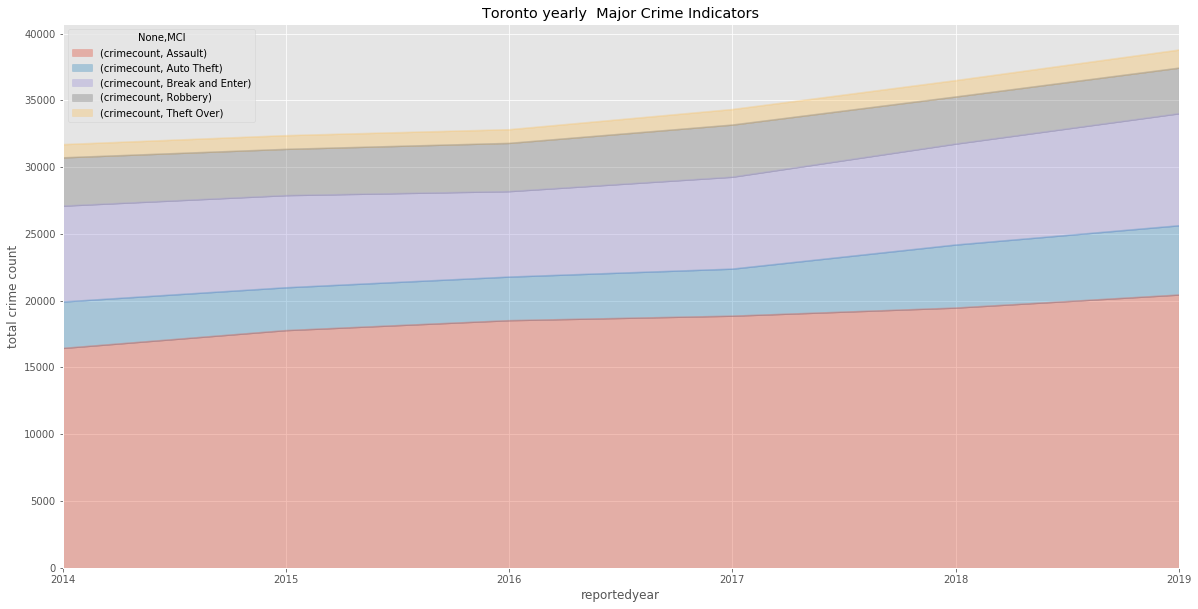

In [15]:
mpl.style.use('ggplot') 
TO_crimeyear1.pivot_table(index='reportedyear',columns='MCI').plot(kind='area', alpha=0.35, figsize=(20, 10))
plt.title('Toronto yearly  Major Crime Indicators')
plt.ylabel('total crime count')
plt.show()

In [16]:
type(TO_yrdivpivot.index.values)
type(TO_yrdivpivot.columns)

pandas.core.indexes.multi.MultiIndex

In [17]:
TO_yrdivpivot.columns.tolist()
TO_yrdivpivot.index.tolist()

[2014, 2015, 2016, 2017, 2018, 2019]

In [18]:
TO_yrdivpivot.index.values

array([2014, 2015, 2016, 2017, 2018, 2019])

>**Bargraph Showing Total crimes**

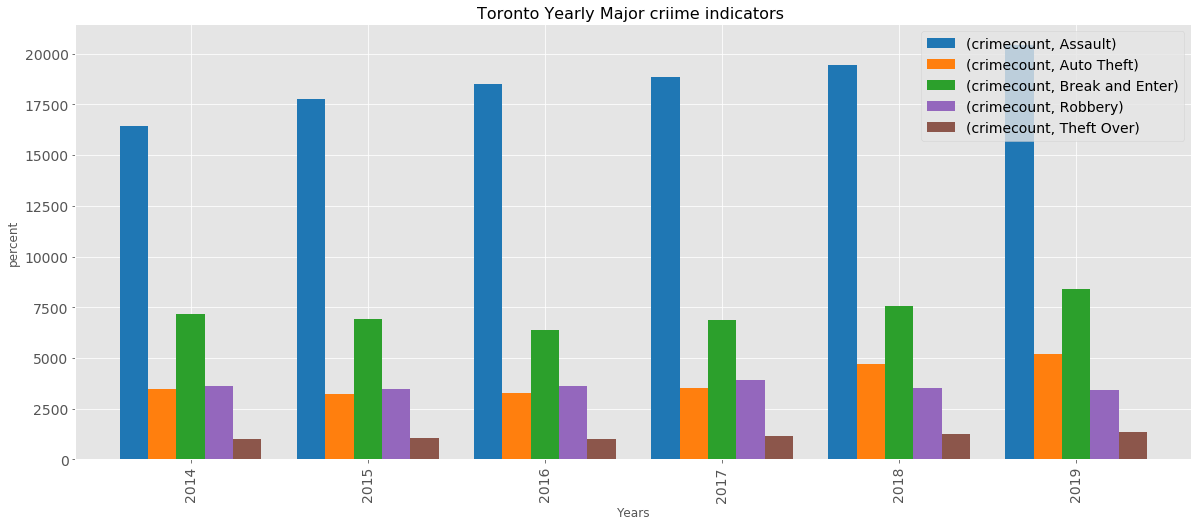

In [19]:
TO_yrdivpivot.plot(kind='bar',figsize=(20,8),width=0.8,color=('#1f77b4','#ff7f0e','#2ca02c','#9467bd','#8c564b'),fontsize=14)
plt.title("Toronto Yearly Major criime indicators ",fontsize=16)
plt.xlabel("Years")
plt.ylabel("percent")
plt.legend(fontsize=14)
plt.show()

>**Considering only 2019 data(to compare with NewYork city 2019 crime statistics)**

In [20]:
TO_crime1=TO_crime[TO_crime['reportedyear']==2019]


In [21]:
TO_crime1.shape

(38770, 29)

In [22]:
TO_crime1.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
126001,-79.227135,43.810932,131401,GO-2019508688,2019-03-20T21:56:00.000Z,2019-03-20T21:56:00.000Z,Outside,1450,120,Discharge Firearm With Intent,...,79.0,Wednesday,21,Assault,D42,132,Malvern (132),-79.227135,43.810932,131002
126004,-79.415932,43.723015,131601,GO-20191095009,2019-06-14T00:09:00.000Z,2019-06-14T00:09:00.000Z,Apartment,1420,100,Assault With Weapon,...,165.0,Friday,0,Assault,D32,39,Bedford Park-Nortown (39),-79.415932,43.723015,131005
126023,-79.555473,43.674221,131819,GO-201912107,2019-01-03T02:15:00.000Z,2019-01-03T02:15:00.000Z,Commercial,1610,210,Robbery - Business,...,3.0,Thursday,2,Robbery,D22,10,Princess-Rosethorn (10),-79.555473,43.674221,131024
126024,-79.435364,43.644207,131820,GO-201923470,2019-01-04T20:34:00.000Z,2019-01-04T20:34:00.000Z,Apartment,1480,100,Assault - Resist/ Prevent Seiz,...,4.0,Friday,20,Assault,D11,86,Roncesvalles (86),-79.435364,43.644207,131025
126025,-79.322212,43.773506,131821,GO-201929353,2019-01-05T20:41:00.000Z,2019-01-05T20:41:00.000Z,Outside,1450,100,Discharge Firearm - Recklessly,...,5.0,Saturday,20,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.322212,43.773506,131026


In [23]:
TO_crime1['reporteddate']=pd.to_datetime(TO_crime1['reporteddate'],infer_datetime_format=True)
print(TO_crime1.dtypes)

X                                  float64
Y                                  float64
Index_                               int64
event_unique_id                     object
occurrencedate                      object
reporteddate           datetime64[ns, UTC]
premisetype                         object
ucr_code                             int64
ucr_ext                              int64
offence                             object
reportedyear                         int64
reportedmonth                       object
reportedday                          int64
reporteddayofyear                    int64
reporteddayofweek                   object
reportedhour                         int64
occurrenceyear                     float64
occurrencemonth                     object
occurrenceday                      float64
occurrencedayofyear                float64
occurrencedayofweek                 object
occurrencehour                       int64
MCI                                 object
Division   

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


>**Checking for  Missing data**

In [24]:
missing_data = TO_crime1.isnull()

In [25]:
missing_data.head()

,X,Y,Index_,event_unique_id,occurrencedate,reporteddate,premisetype,ucr_code,ucr_ext,offence,...,occurrencedayofyear,occurrencedayofweek,occurrencehour,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,ObjectId
126001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
126004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
126023,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
126024,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
126025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

X
False    38770
Name: X, dtype: int64

Y
False    38770
Name: Y, dtype: int64

Index_
False    38770
Name: Index_, dtype: int64

event_unique_id
False    38770
Name: event_unique_id, dtype: int64

occurrencedate
False    38770
Name: occurrencedate, dtype: int64

reporteddate
False    38770
Name: reporteddate, dtype: int64

premisetype
False    38770
Name: premisetype, dtype: int64

ucr_code
False    38770
Name: ucr_code, dtype: int64

ucr_ext
False    38770
Name: ucr_ext, dtype: int64

offence
False    38770
Name: offence, dtype: int64

reportedyear
False    38770
Name: reportedyear, dtype: int64

reportedmonth
False    38770
Name: reportedmonth, dtype: int64

reportedday
False    38770
Name: reportedday, dtype: int64

reporteddayofyear
False    38770
Name: reporteddayofyear, dtype: int64

reporteddayofweek
False    38770
Name: reporteddayofweek, dtype: int64

reportedhour
False    38770
Name: reportedhour, dtype: int64

occurrenceyear
False    38761
True         9
Name: occurrenceyea

>The columns reporteddate,Division,Hood_ID,Long,Lat which are needed  do not have any Missing data 

In [27]:
TO_crime1.drop(['X','Y','Index_','occurrencedate','reporteddate','premisetype','ucr_code','ucr_ext','offence','reportedday','reporteddayofyear','reporteddayofweek',
 'reportedhour','occurrenceyear','occurrencemonth','occurrenceday','occurrencedayofyear','occurrencedayofweek','occurrencehour','ObjectId'],axis=1,inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [28]:
TO_crime1.head()

,event_unique_id,reportedyear,reportedmonth,MCI,Division,Hood_ID,Neighbourhood,Long,Lat
126001,GO-2019508688,2019,March,Assault,D42,132,Malvern (132),-79.227135,43.810932
126004,GO-20191095009,2019,June,Assault,D32,39,Bedford Park-Nortown (39),-79.415932,43.723015
126023,GO-201912107,2019,January,Robbery,D22,10,Princess-Rosethorn (10),-79.555473,43.674221
126024,GO-201923470,2019,January,Assault,D11,86,Roncesvalles (86),-79.435364,43.644207
126025,GO-201929353,2019,January,Assault,D42,118,Tam O'Shanter-Sullivan (118),-79.322212,43.773506


In [29]:
TO_crimemonth=TO_crime1.groupby(['reportedmonth'],as_index=True).count()

In [30]:
TO_crimemonth.sort_index()

,event_unique_id,reportedyear,MCI,Division,Hood_ID,Neighbourhood,Long,Lat
reportedmonth,,,,,,,,
April,3105,3105,3105,3105,3105,3105,3105,3105
August,3430,3430,3430,3430,3430,3430,3430,3430
December,3022,3022,3022,3022,3022,3022,3022,3022
February,2714,2714,2714,2714,2714,2714,2714,2714
January,2927,2927,2927,2927,2927,2927,2927,2927
July,3689,3689,3689,3689,3689,3689,3689,3689
June,3424,3424,3424,3424,3424,3424,3424,3424
March,2941,2941,2941,2941,2941,2941,2941,2941
May,3369,3369,3369,3369,3369,3369,3369,3369


In [31]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
TO_crimemonth = TO_crimemonth.reindex(new_order, axis=0)

In [32]:
TO_crimemonth["crimecount"]=TO_crimemonth['event_unique_id']
TO_crimemonth.drop(['event_unique_id','reportedyear','MCI','Division','Hood_ID','Neighbourhood','Long','Lat'],axis=1,inplace=True)
TO_crimemonth

,crimecount
reportedmonth,
January,2927
February,2714
March,2941
April,3105
May,3369
June,3424
July,3689
August,3430
September,3241


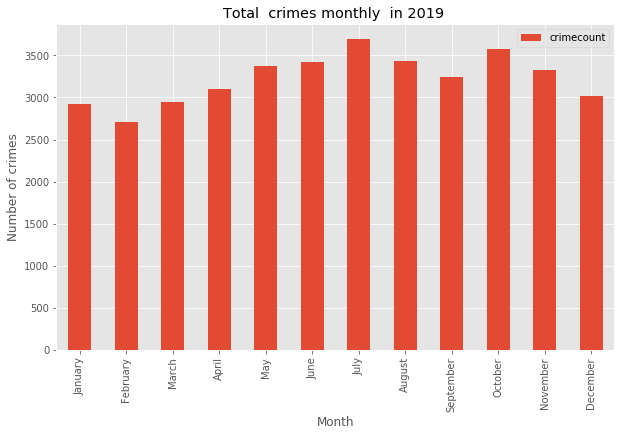

In [33]:
TO_crimemonth.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Month') # add to x-label to the plot
plt.ylabel('Number of crimes') # add y-label to the plot
plt.title('Total  crimes monthly  in 2019 ') # add title to the plot

plt.show()

In [34]:
TO_crimetest=TO_crime1.drop(['Hood_ID','Neighbourhood','Long','Lat'],axis=1,inplace=False)

In [35]:
TO_crimediv= TO_crimetest.groupby(['Division','MCI'],as_index=False).count()
TO_crimediv["count"]=TO_crimediv['event_unique_id']
TO_crimediv.drop(['event_unique_id','reportedyear','reportedmonth'],axis=1,inplace=True)

In [36]:
TO_crimediv.head()

,Division,MCI,count
0,D11,Assault,780
1,D11,Auto Theft,160
2,D11,Break and Enter,444
3,D11,Robbery,151
4,D11,Theft Over,57


In [37]:
TO_crimedivpivot=TO_crimediv.pivot_table(index='Division',columns='MCI')

In [38]:
TO_crimedivpivot.columns

MultiIndex(levels=[['count'], ['Assault', 'Auto Theft', 'Break and Enter', 'Robbery', 'Theft Over']],
           codes=[[0, 0, 0, 0, 0], [0, 1, 2, 3, 4]],
           names=[None, 'MCI'])

In [39]:
TO_crimedivpivot.head()

count                                              
MCI      Assault Auto Theft Break and Enter Robbery Theft Over
Division                                                      
D11          780        160             444     151         57
D12          823        298             246     108         45
D13          698        178             341     184         31
D14         1533        171             906     189        109
D22         1027        453             512     188         97

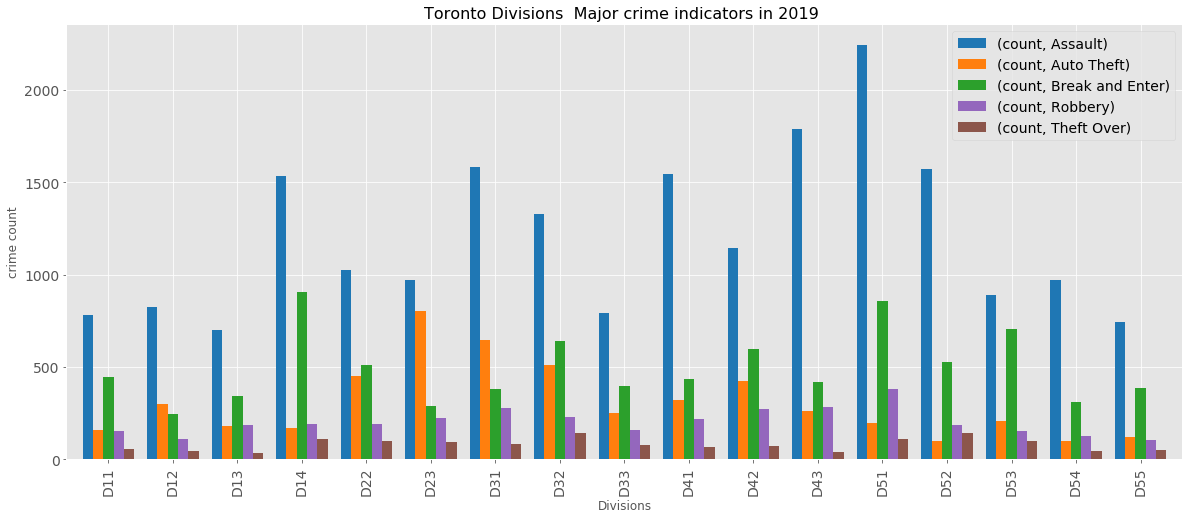

In [40]:
TO_crimedivpivot.plot(kind='bar',figsize=(20,8),width=0.8,color=('#1f77b4','#ff7f0e','#2ca02c','#9467bd','#8c564b'),fontsize=14)
plt.title("Toronto Divisions  Major crime indicators in 2019 ",fontsize=16)
plt.xlabel("Divisions")
plt.ylabel("crime count")
plt.legend(fontsize=14)
#plt.annotate({},xy=(),xytext=,xycoords='data')
plt.show()

In [41]:
df_TOdiv=TO_crimetest.groupby(['Division'],as_index=True).count()
df_TOdiv["Total"]=df_TOdiv['event_unique_id']
df_TOdiv.drop(['event_unique_id','MCI','reportedyear','reportedmonth'],axis=1,inplace=True)
df_TOdiv.head()

,Total
Division,
D11,1592
D12,1520
D13,1432
D14,2908
D22,2277


In [42]:
df_TOdiv.sort_values(by=['Total'], ascending=False, inplace=True)

In [43]:
df_TOdiv.head()

,Total
Division,
D51,3785
D31,2967
D14,2908
D32,2854
D43,2785


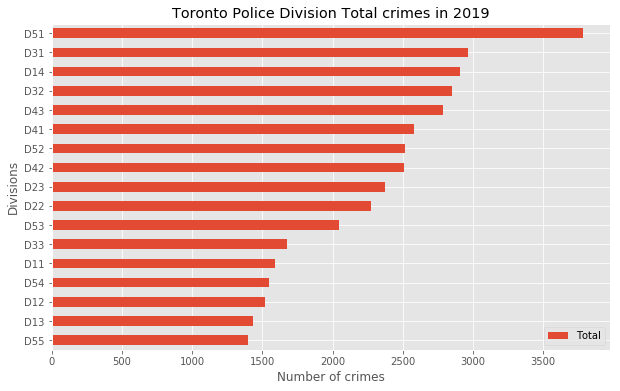

In [44]:
ax = df_TOdiv.plot(kind='barh', figsize=(10, 6))
ax.set_title('Toronto Police Division Total crimes in 2019')
ax.set_ylabel('Divisions')
ax.set_xlabel('Number of crimes')
ax.invert_yaxis() 
plt.show()

In [45]:
df_TOdiv= df_TOdiv.reset_index()

In [46]:
df_TOdiv['Division']=df_TOdiv['Division'].str.replace('D', '')

In [47]:
df_TOdiv['Division']=pd.to_numeric(df_TOdiv['Division'])

In [48]:
df_TOdiv.head()

,Division,Total
0,51,3785
1,31,2967
2,14,2908
3,32,2854
4,43,2785


In [49]:
df_TOdiv.dtypes

Division    int64
Total       int64
dtype: object

>**Toronto Police Boundaries Geojson file is loaded**

In [50]:

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
streaming_body_1 = client_39b0704d64734c2a93f752ce733d60dc.get_object(Bucket='battleofneighborhoods-donotdelete-pr-boqlx7nqe3wunh', Key='Police Boundaries Data.geojson')['Body']
# add missing __iter__ method so pandas accepts body as file-like object
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 
readrawdata = streaming_body_1.read()

In [51]:
from io import BytesIO
import json

In [52]:
df_div=json.load(BytesIO(readrawdata))

In [53]:
type(df_div)

dict

>*The geograpical coordinates of Toronto are obtained using Nominatim*

In [54]:
address = 'Toronto ,Ontario, Canada'

geolocator = Nominatim(user_agent="TO_explorer")
location = geolocator.geocode(address)
TO_latitude = location.latitude
TO_longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(TO_latitude, TO_longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


>**Visulization of Toronto Division crimes using Choropleth Maps**

>* GeoJson Popup shows the Division Name and Missing Division data is coloured in Black*

In [56]:
from folium.features import GeoJson,GeoJsonPopup
import numpy as np 
loc = 'Toronto Police Divisions Choropleth map of crimes in 2019'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
popup = GeoJsonPopup(
    fields=['AREA_NAME'],
    aliases=['Division'],
    localize=True,
    labels=True,
    style="background-color: yellow;",
)

threshold_scale = np.linspace(df_TOdiv['Total'].min(),
                              df_TOdiv['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration
threshold_scale
mp= folium.Map(location=[TO_latitude,TO_longitude], zoom_start=10)
choropleth=folium.Choropleth(
    geo_data=df_div,
    data=df_TOdiv,
    columns=['Division', 'Total'],
    key_on='feature.properties.AREA_NAME',
    fill_color='YlOrRd',bins=threshold_scale,
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime Count',reset=True,highlight=True).add_to(mp)
popup.add_to(choropleth.geojson)
print(type(choropleth.geojson))
folium.LayerControl().add_to(mp)
mp.get_root().html.add_child(folium.Element(title_html))

mp

<class 'folium.features.GeoJson'>


>For the purposes of this map I have trimmed the 2019 crimes dataset down to 1000  rows by taking a random subset of the dataframe. 
>By simply calling  the sample() method, specifying the number of samples required 
>Finally any missing lat, lon, values are dropped from the dataframe using the dropna() method

In [62]:
TO_random= TO_crime1.sample(n=1000, random_state=42)
TO_random.dropna(subset=["Lat", "Long"], inplace=True)
TO_random.reset_index()
TO_random.head()

,event_unique_id,reportedyear,reportedmonth,MCI,Division,Hood_ID,Neighbourhood,Long,Lat
176516,GO-20191305746,2019,July,Assault,D52,77,Waterfront Communities-The Island (77),-79.380867,43.641460
139179,GO-20192065710,2019,October,Assault,D54,68,North Riverdale (68),-79.350746,43.677795
205234,GO-20192054857,2019,October,Auto Theft,D31,21,Humber Summit (21),-79.541214,43.765755
135889,GO-20192317011,2019,December,Break and Enter,D54,57,Broadview North (57),-79.351479,43.696300
169667,GO-20191430664,2019,July,Assault,D54,58,Old East York (58),-79.351051,43.695381


In [58]:
TO_random.MCI.unique()

array(['Assault', 'Auto Theft', 'Break and Enter', 'Robbery',
       'Theft Over'], dtype=object)

>Assault: The direct or indirect application of force to another person, or the
>attempt or threat to apply force to another person, without that person’s consent.

>Auto Theft: The act of taking another person's vehicle (not including attempts).
>Auto Theft figures represent the number of vehicles stolen.

>Break and Enter: The act of entering a place with the intent to commit an
>indictable offence therein.

>Theft Over: The act of stealing property 
    
>Robbery: The act of taking property from another person or business by the use
>of force or intimidation in the presence of the victim.


>A dictionary of Labels is created and anew column Labels  is added which specify the crime type

In [63]:
label_dic = {'Robbery':4,'Assault':3,'Break and Enter':2,'Theft Over':1,'Auto Theft':0}
TO_random['Label'] = TO_random['MCI'].map(label_dic)
TO_random.head()

,event_unique_id,reportedyear,reportedmonth,MCI,Division,Hood_ID,Neighbourhood,Long,Lat,Label
176516,GO-20191305746,2019,July,Assault,D52,77,Waterfront Communities-The Island (77),-79.380867,43.641460,3
139179,GO-20192065710,2019,October,Assault,D54,68,North Riverdale (68),-79.350746,43.677795,3
205234,GO-20192054857,2019,October,Auto Theft,D31,21,Humber Summit (21),-79.541214,43.765755,0
135889,GO-20192317011,2019,December,Break and Enter,D54,57,Broadview North (57),-79.351479,43.696300,2
169667,GO-20191430664,2019,July,Assault,D54,58,Old East York (58),-79.351051,43.695381,3


>**Adding coloured map markers to each type of MCI -Using Folium CircleMarker  and Popup displays the type of crime 
>when user click on the marker  and the marker is added to theFeatureGroup and the Feature Group is added to map**


In [64]:
loc = 'Toronto Major crime Indicators map of 2019'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)   
TO_map = folium.Map(location=[TO_latitude, TO_longitude], zoom_start=10)
kclusters=len(label_dic)
x = np.arange(kclusters)
colors_array=['orange','purple','green','blue','red']
for cluster in range(0,kclusters): 
    group = folium.FeatureGroup(name='<span style="color:{0};">{1}</span>'.format(colors_array[cluster],cluster))
       
    for lat, lon, mci, label in zip(TO_random['Lat'], TO_random['Long'], TO_random['MCI'], TO_random['Label']):
        if int(label) == cluster: 
            label = folium.Popup('CRIME'+ str(mci) + 'Label ' + str(cluster))
            folium.CircleMarker(
                (lat, lon),
                radius=5,
                popup=label,
                color=colors_array[cluster],
                fill=True,
                fill_color=colors_array[cluster],
                fill_opacity=0.7).add_to(group)
    group.add_to(TO_map)
folium.map.LayerControl('topright', collapsed=False).add_to(TO_map)
TO_map.get_root().html.add_child(folium.Element(title_html))
TO_map
